In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

/Users/giovanni.palla/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2


In [2]:
adata = (
    sq.datasets.four_i()
)  # sc.read("/Users/giovanni.palla/Datasets/tutorial_data/4i.h5ad")
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 270938 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
# sc.pp.subsample(adata, fraction=0.05)

In [3]:
adata

AnnData object with n_obs × n_vars = 270938 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

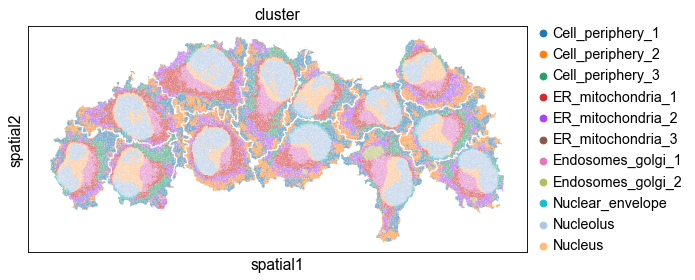

In [5]:
sc.pl.spatial(
    adata,
    spot_size=1,
    color="cluster",
    #     save="_4i.png",
    #     show=False,
)

In [6]:
# sq.gr.spatial_neighbors(adata)

Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [4]:
sq.gr.co_occurrence(adata, cluster_key="cluster", n_jobs=4, n_splits=20)

Calculating co-occurrence probabilities for            `50` intervals            `210` split combinations            using `4` core(s)


Adding `adata.uns['cluster_co_occurrence']`
Finish (0:29:40)


In [6]:
adata.uns["cluster_co_occurrence"]["occ"].shape

(11, 11, 49)

No handles with labels found to put in legend.


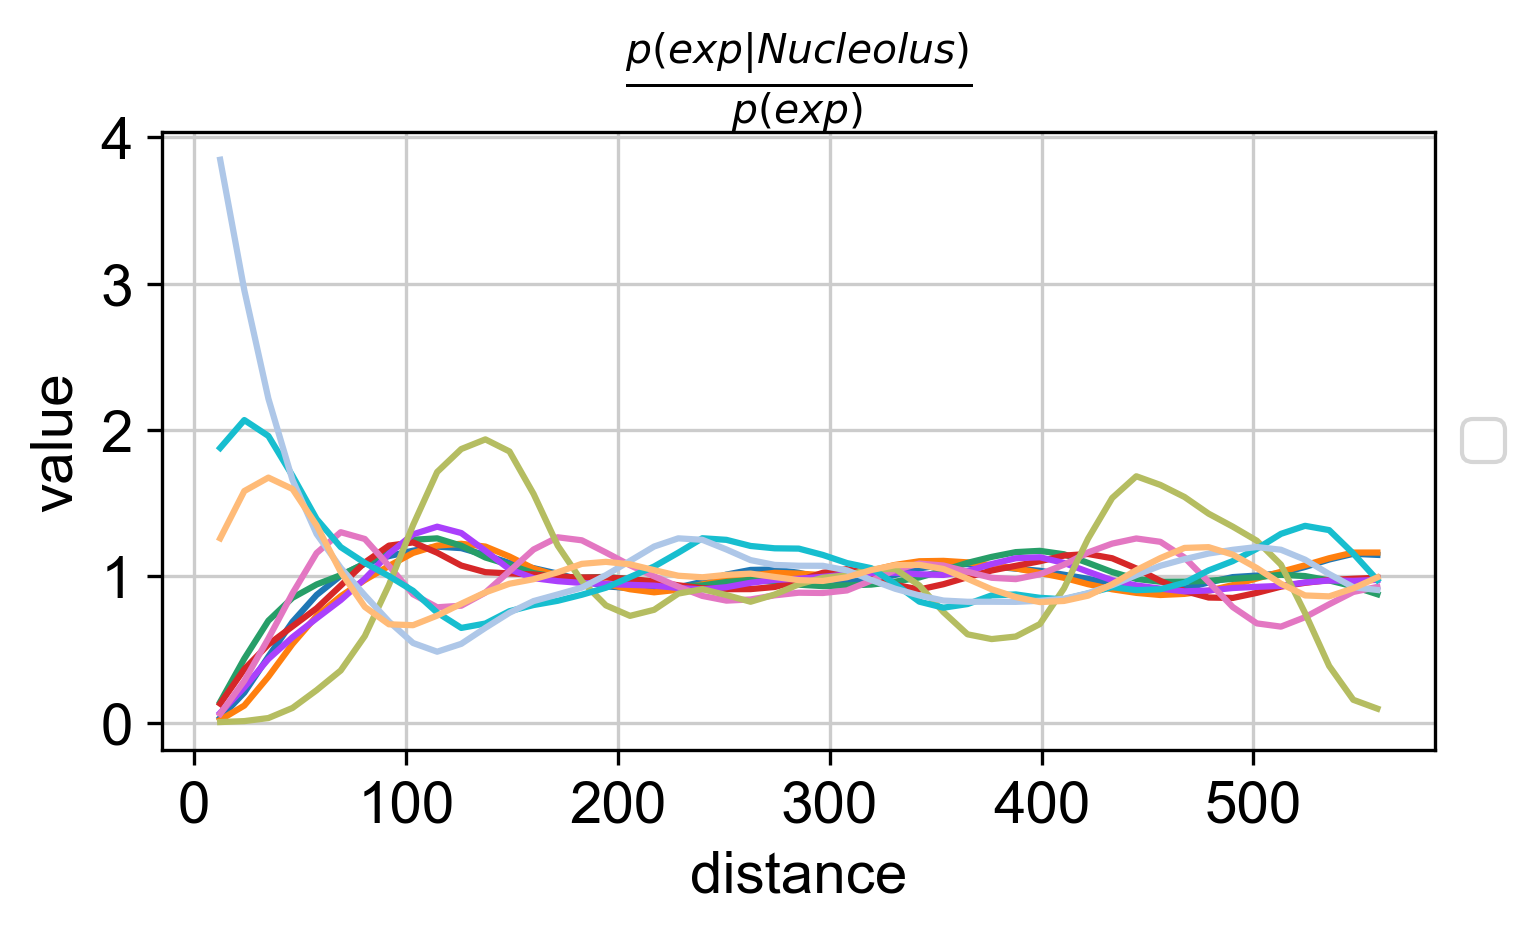

In [11]:
sq.pl.co_occurrence(
    adata,
    cluster_key="cluster",
    clusters="Nucleolus",
    dpi=300,
    figsize=(5, 3),
    legend=False,
    save="co_occurrence_4i",
)

No handles with labels found to put in legend.


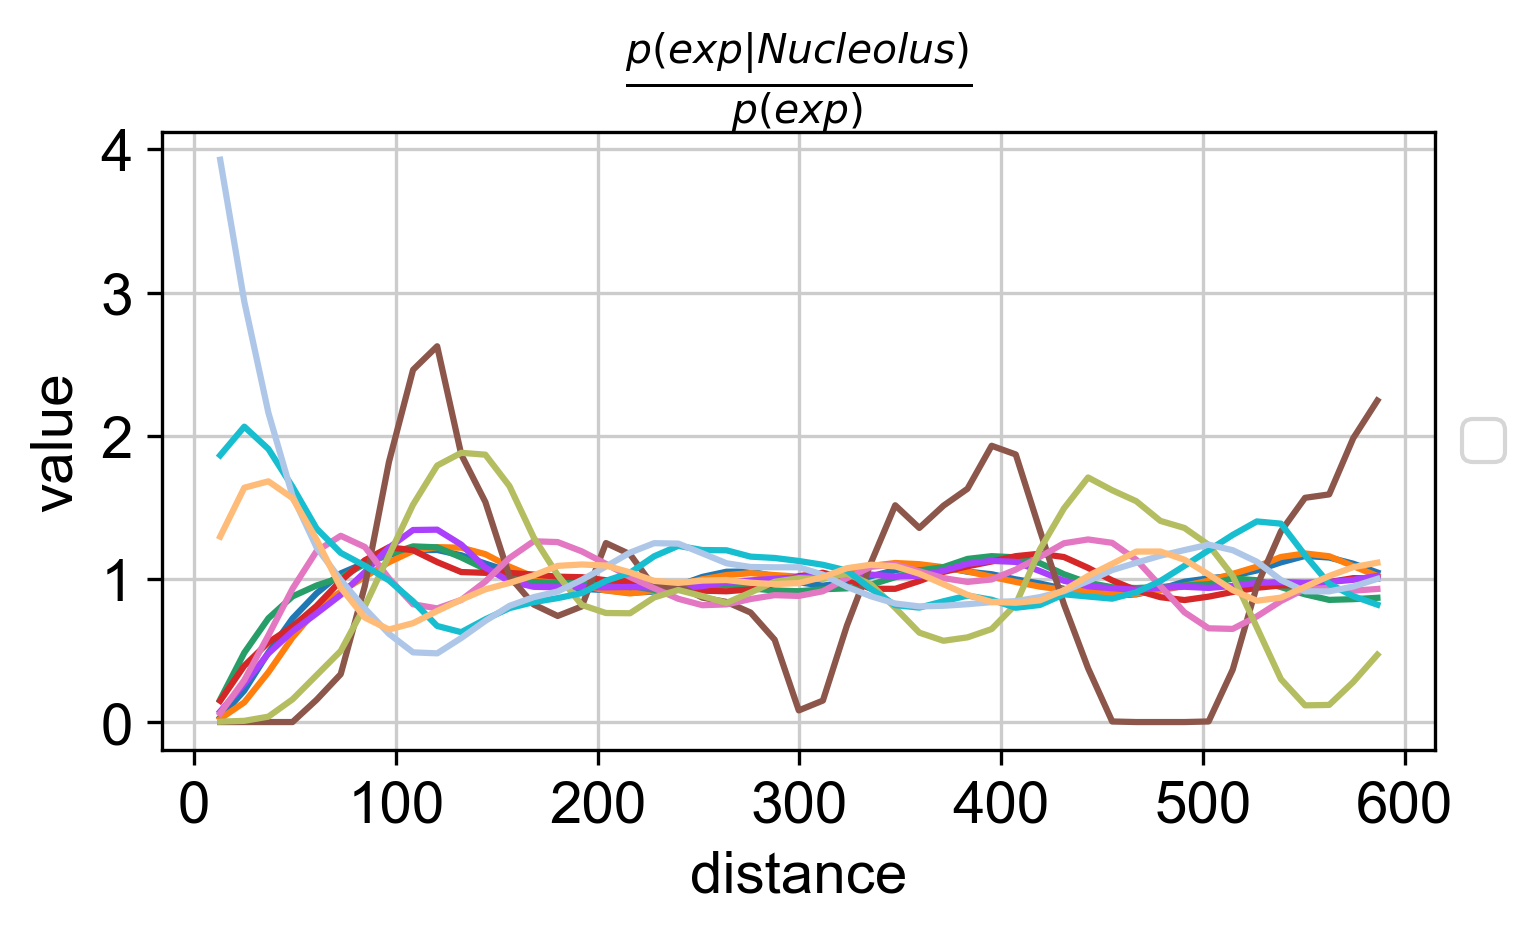

In [12]:
sq.pl.co_occurrence(
    adata,
    cluster_key="cluster",
    clusters="Nucleolus",
    dpi=300,
    figsize=(5, 3),
    legend=False,
#     save="co_occurrence_4i",
)